In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
data = pd.read_csv('train.csv')

In [15]:
data['purchased'].value_counts()

0    16043
1     1618
Name: purchased, dtype: int64

In [16]:
16043/(16043+1618)

0.9083857086235207

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17652 non-null  object 
 1   days_on_platform        17661 non-null  int64  
 2   minutes_watched         17661 non-null  float64
 3   courses_started         17661 non-null  int64  
 4   practice_exams_started  17661 non-null  int64  
 5   practice_exams_passed   17661 non-null  int64  
 6   minutes_spent_on_exams  17661 non-null  float64
 7   purchased               17661 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [18]:
data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000,17661.000000
mean,122.950909,30.614144,1.193081,0.269690,0.170659,1.191348,0.091614
std,90.701835,89.197582,0.639029,1.659088,1.097656,7.729778,0.288489
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,203.000000,33.900000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


In [19]:
data.isnull().sum()

student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

array([[<Axes: title={'center': 'days_on_platform'}>,
        <Axes: title={'center': 'minutes_watched'}>,
        <Axes: title={'center': 'courses_started'}>],
       [<Axes: title={'center': 'practice_exams_started'}>,
        <Axes: title={'center': 'practice_exams_passed'}>,
        <Axes: title={'center': 'minutes_spent_on_exams'}>],
       [<Axes: title={'center': 'purchased'}>, <Axes: >, <Axes: >]],
      dtype=object)

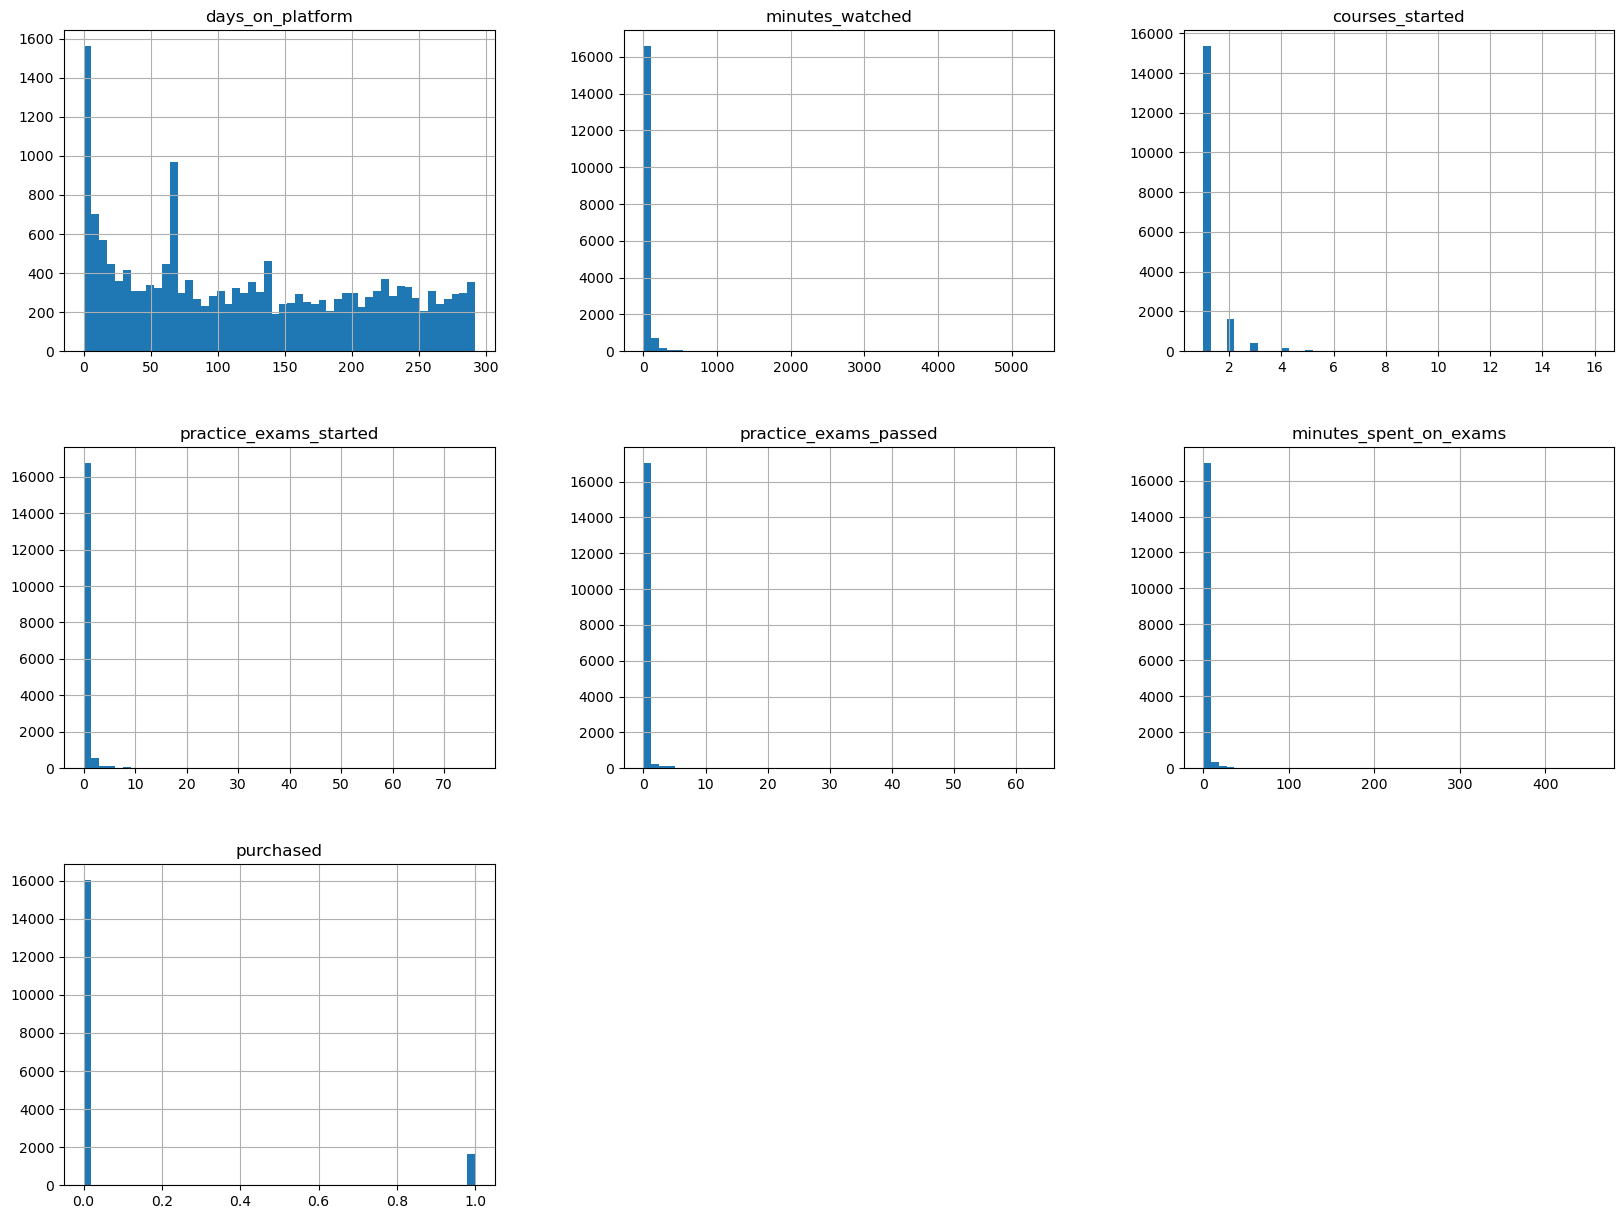

In [20]:
data.hist(bins=50, figsize=(20,15))

In [21]:
data.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'],
      dtype='object')

# Split The data


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in split.split(data,data['purchased']):
    s_train_set = data.loc[train]
    s_test_set = data.loc[test]    

In [23]:
s_train_set['purchased'].value_counts(),s_test_set['purchased'].value_counts()

(0    12834
 1     1294
 Name: purchased, dtype: int64,
 0    3209
 1     324
 Name: purchased, dtype: int64)

In [24]:
df = s_train_set.copy()
df.shape

(14128, 8)

In [25]:
corr_matrix = df.corr()

C:\Users\Pritam\AppData\Local\Temp\ipykernel_2660\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [26]:
corr_matrix['purchased']

days_on_platform         -0.388563
minutes_watched           0.113594
courses_started           0.041152
practice_exams_started    0.025650
practice_exams_passed     0.036133
minutes_spent_on_exams    0.011143
purchased                 1.000000
Name: purchased, dtype: float64

# Preprocessing and fit the Student_country

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['student_country_encoded'] = label_encoder.fit_transform(df['student_country'])


In [28]:
New_df = pd.get_dummies(df, columns=['student_country'], prefix='country')

In [29]:
New_df.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,student_country_encoded,country_AE,country_AG,...,country_UZ,country_VC,country_VE,country_VN,country_VU,country_XK,country_YE,country_ZA,country_ZM,country_ZW
3362,257,33.2,1,0,0,0.0,0,44,0,0,...,0,0,0,0,0,0,0,0,0,0
837,140,16.9,4,2,2,6.0,0,132,0,0,...,0,0,0,0,0,0,0,0,0,0
16416,16,0.1,1,0,0,0.0,0,58,0,0,...,0,0,0,0,0,0,0,0,0,0
16886,10,1.3,1,0,0,0.0,0,71,0,0,...,0,0,0,0,0,0,0,0,0,0
6180,206,0.1,1,0,0,0.0,0,92,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation

,minutes_watched,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
minutes_watched,1.000000,0.572567,0.603944,0.594059
practice_exams_started,0.572567,1.000000,0.906236,0.863084
practice_exams_passed,0.603944,0.906236,1.000000,0.809034
minutes_spent_on_exams,0.594059,0.863084,0.809034,1.000000


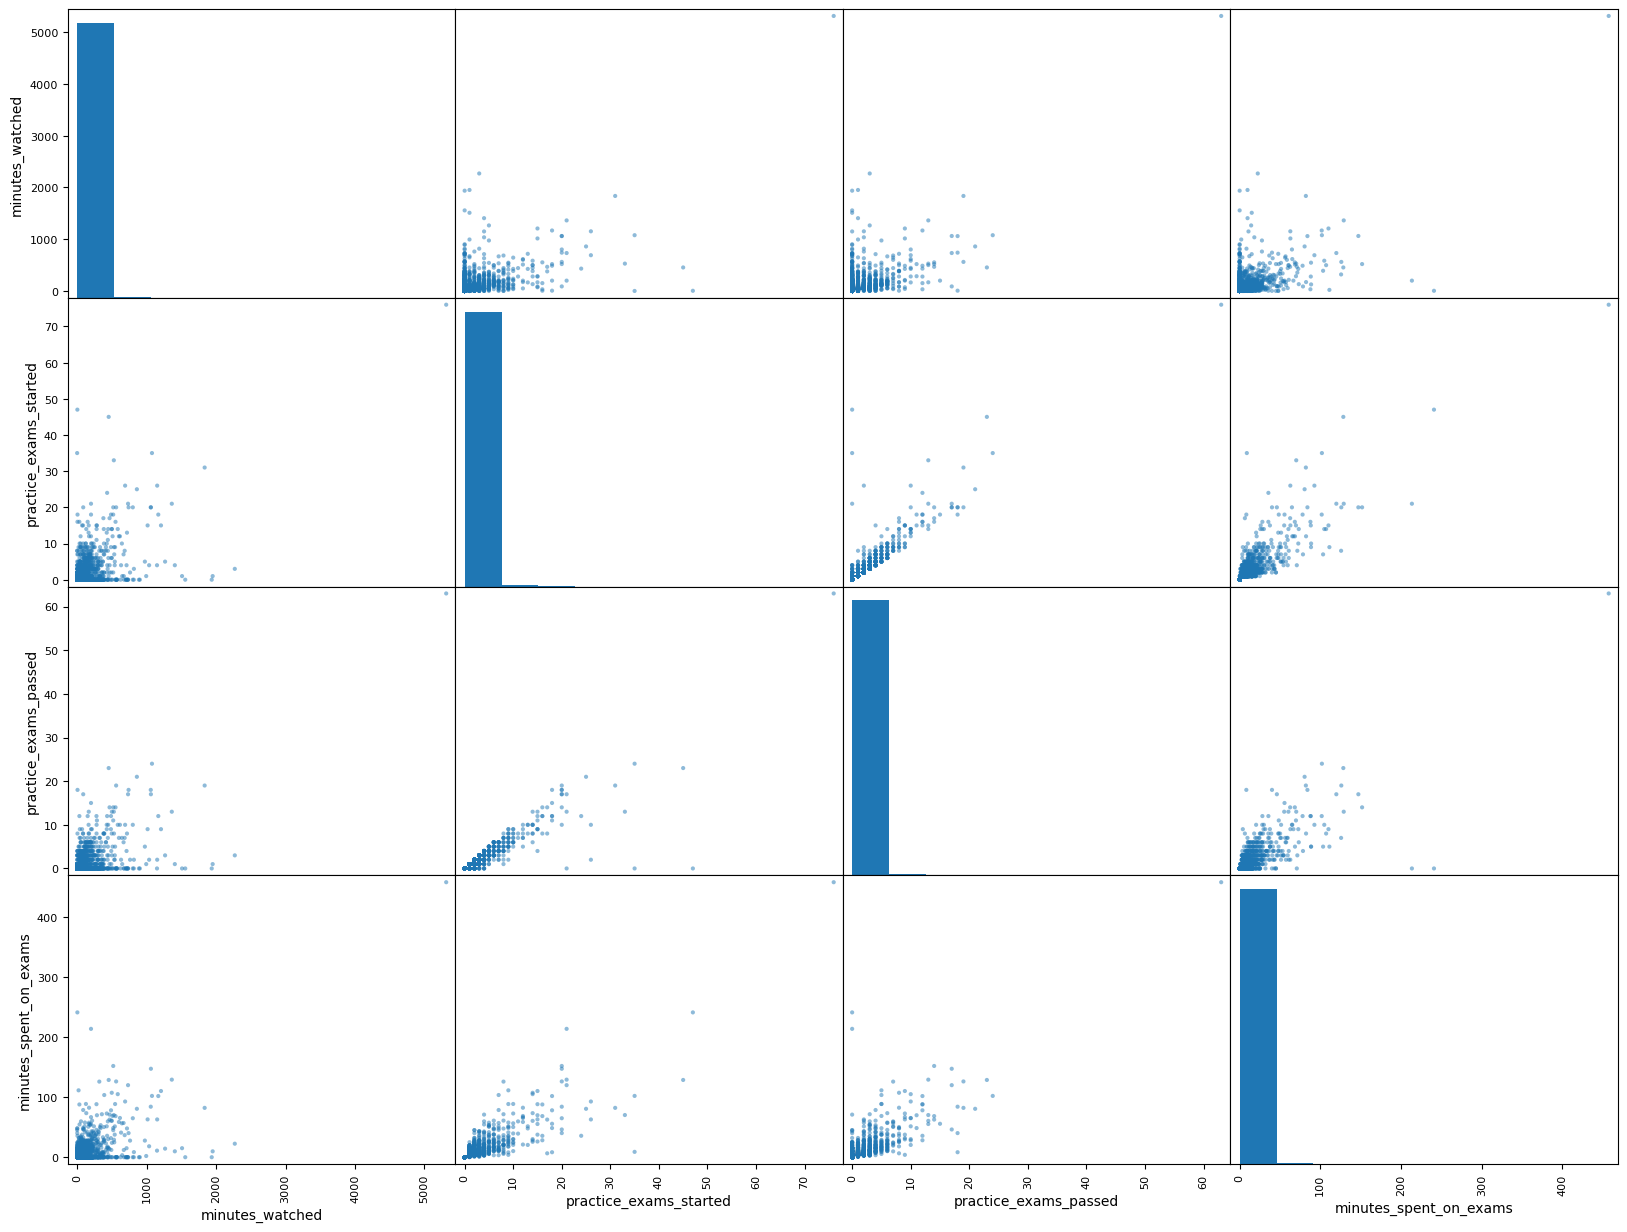

In [30]:
from pandas.plotting import scatter_matrix
attr = ['minutes_watched', 'practice_exams_started', 'practice_exams_passed','minutes_spent_on_exams']
scatter_matrix(df[attr], figsize=(20,15))
corr = pd.DataFrame(df[attr].corr())
corr

In [31]:
print('practice_exams_started\n\n',corr_matrix['practice_exams_started'])
# print('practice_exams_passed\n\n',corr_matrix['practice_exams_passed'])
print('minutes_spent_on_exams\n\n',corr_matrix['minutes_spent_on_exams'])

practice_exams_started

 days_on_platform         -0.098109
minutes_watched           0.572567
courses_started           0.304618
practice_exams_started    1.000000
practice_exams_passed     0.906236
minutes_spent_on_exams    0.863084
purchased                 0.025650
Name: practice_exams_started, dtype: float64
minutes_spent_on_exams

 days_on_platform         -0.083843
minutes_watched           0.594059
courses_started           0.323346
practice_exams_started    0.863084
practice_exams_passed     0.809034
minutes_spent_on_exams    1.000000
purchased                 0.011143
Name: minutes_spent_on_exams, dtype: float64


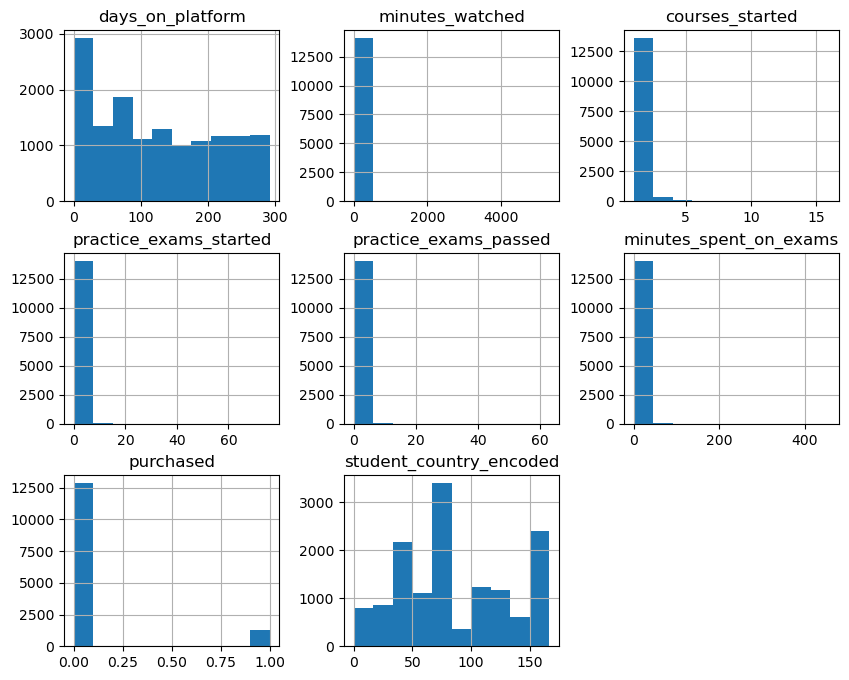

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,student_country_encoded
3362,EE,257,33.2,1,0,0,0.0,0,44
837,SA,140,16.9,4,2,2,6.0,0,132
16416,GR,16,0.1,1,0,0,0.0,0,58
16886,IT,10,1.3,1,0,0,0.0,0,71
6180,MA,206,0.1,1,0,0,0.0,0,92


In [32]:
# Assuming you have a DataFrame called 'df' with your data
df.hist(figsize=(10, 8))
plt.show()
df.head()

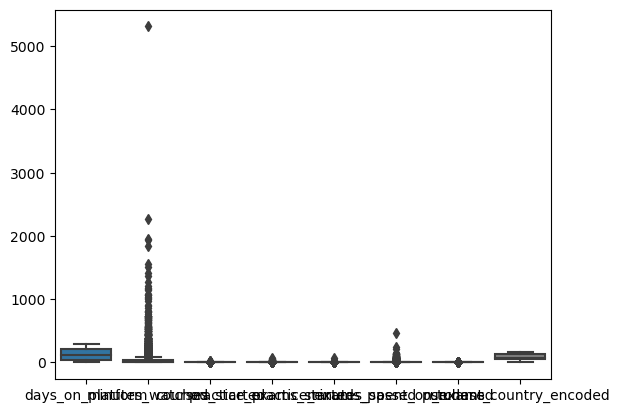

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your data
sns.boxplot(data=df)
plt.show()


# Remove The Outliers

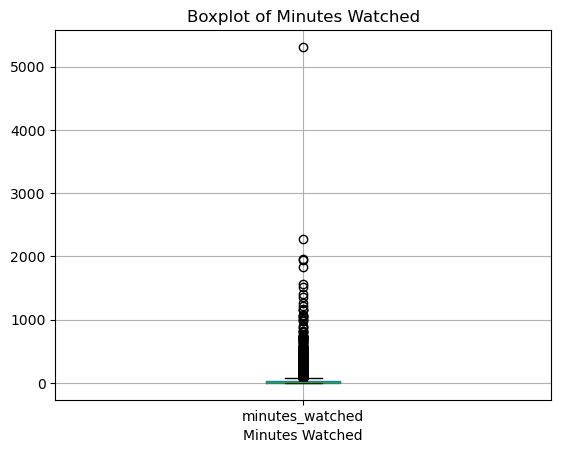

In [34]:
# df.boxplot(figsize=(20,15))
df.boxplot(column='minutes_watched')

# Add labels and title for better clarity (optional)
plt.xlabel('Minutes Watched')
plt.title('Boxplot of Minutes Watched')

# Show the plot
plt.show()

In [35]:
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,student_country_encoded
3362,EE,257,33.2,1,0,0,0.0,0,44
837,SA,140,16.9,4,2,2,6.0,0,132
16416,GR,16,0.1,1,0,0,0.0,0,58
16886,IT,10,1.3,1,0,0,0.0,0,71
6180,MA,206,0.1,1,0,0,0.0,0,92


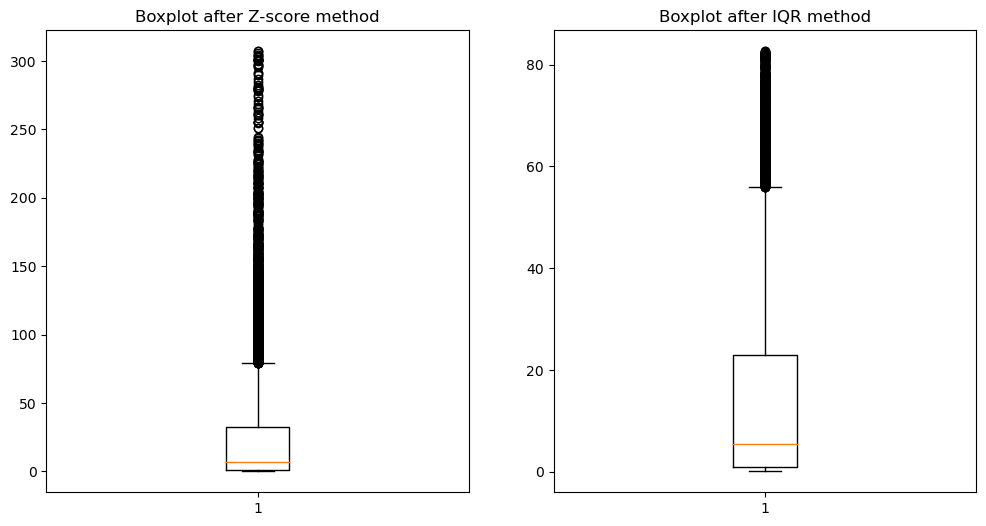

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

# Calculate Z-scores
z_scores = stats.zscore(df['minutes_watched'])
threshold = 3
df_no_outliers_zscore = df[(z_scores < threshold) & (z_scores > -threshold)]

# Calculate IQR
Q1 = df['minutes_watched'].quantile(0.25)
Q3 = df['minutes_watched'].quantile(0.75)
IQR = Q3 - Q1
multiplier = 1.5
df_no_outliers_iqr = df[(df['minutes_watched'] > Q1 - multiplier * IQR) & (df['minutes_watched'] < Q3 + multiplier * IQR)]

# Plot boxplots for both methods
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_no_outliers_zscore['minutes_watched'])
plt.title('Boxplot after Z-score method')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers_iqr['minutes_watched'])
plt.title('Boxplot after IQR method')

plt.show()


#'minutes_spent_on_exams'

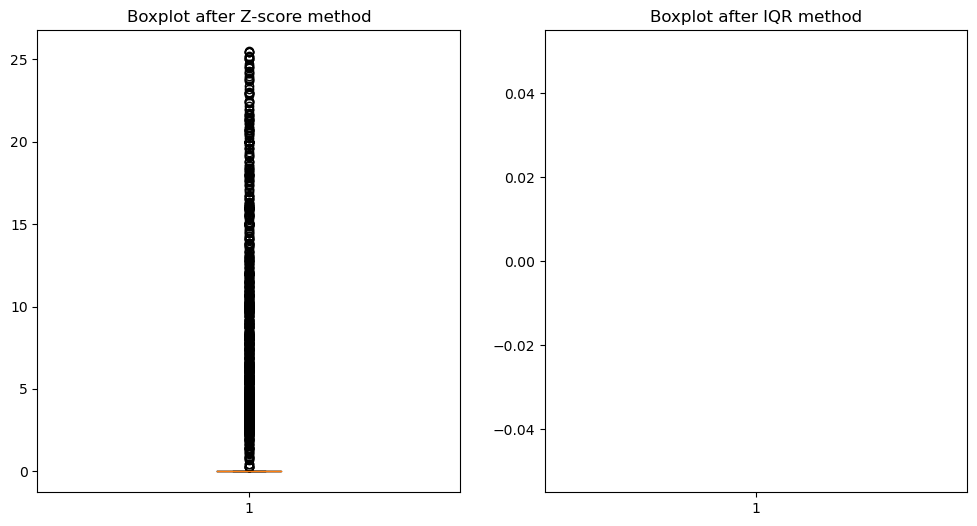

In [37]:
from scipy import stats
import matplotlib.pyplot as plt

# Calculate Z-scores
z_scores = stats.zscore(df['minutes_spent_on_exams'])
threshold = 3
df_no_outliers_zscore = df[(z_scores < threshold) & (z_scores > -threshold)]

# Calculate IQR
Q1 = df['minutes_spent_on_exams'].quantile(0.25)
Q3 = df['minutes_spent_on_exams'].quantile(0.75)
IQR = Q3 - Q1
multiplier = 1.5
df_no_outliers_iqr = df[(df['minutes_spent_on_exams'] > Q1 - multiplier * IQR) & (df['minutes_spent_on_exams'] < Q3 + multiplier * IQR)]

# Plot boxplots for both methods
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_no_outliers_zscore['minutes_spent_on_exams'])
plt.title('Boxplot after Z-score method')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers_iqr['minutes_spent_on_exams'])
plt.title('Boxplot after IQR method')

plt.show()


#'minutes_spent_on_exams'

In [38]:
df_no_outliers_zscore.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased', 'student_country_encoded'],
      dtype='object')

In [39]:
df_no_outliers_zscore.sort_values(by='student_country').head(10)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,student_country_encoded
11096,AE,111,0.8,1,0,0,0.0,0,0
11039,AE,112,305.8,1,0,0,0.0,0,0
4322,AE,239,51.5,2,0,0,0.0,0,0
2983,AE,264,0.4,1,0,0,0.0,0,0
8066,AE,168,4.1,2,0,0,0.0,0,0
12391,AE,81,15.0,1,0,0,0.0,0,0
8631,AE,156,6.6,1,0,0,0.0,0,0
9233,AE,143,1.4,1,0,0,0.0,0,0
14086,AE,58,2.0,1,0,0,0.0,0,0
9827,AE,134,50.6,1,0,0,0.0,0,0


In [40]:
final_train_df = df_no_outliers_zscore.copy()
final_train_df.shape
# 1.(14128, 8)
# 2.(13975, 9)
# 3.(13975, 9)

(13975, 9)

In [41]:
final_train_df.isnull().sum()

student_country            5
days_on_platform           0
minutes_watched            0
courses_started            0
practice_exams_started     0
practice_exams_passed      0
minutes_spent_on_exams     0
purchased                  0
student_country_encoded    0
dtype: int64

In [42]:
final_train_df.drop(['student_country','practice_exams_passed','minutes_spent_on_exams'], axis=1, inplace=True)

In [43]:
final_train_data_feature = final_train_df.drop('purchased', axis=1)

In [44]:
final_train_data_feature.columns
# final_train_data_feature.shape

Index(['days_on_platform', 'minutes_watched', 'courses_started',
       'practice_exams_started', 'student_country_encoded'],
      dtype='object')

In [45]:
final_train_data_label = final_train_df['purchased']

In [46]:
final_train_data_label.shape

(13975,)

#  This is for test purpose 


In [47]:
X_train, X_test, y_train, y_test = train_test_split(final_train_data_feature, final_train_data_label, test_size=0.05, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

'''
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       634
           1       0.86      0.77      0.81        65

    accuracy                           0.97       699
   macro avg       0.92      0.88      0.90       699
weighted avg       0.97      0.97      0.97       699

'''
# svm_classifier = SVC(kernel='linear', random_state=42)
'''
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       634
           1       0.88      0.65      0.74        65

    accuracy                           0.96       699
   macro avg       0.92      0.82      0.86       699
weighted avg       0.96      0.96      0.96       699

'''
# logreg_classifier = LogisticRegression(random_state=42)

'''
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       634
           1       0.89      0.65      0.75        65

    accuracy                           0.96       699
   macro avg       0.93      0.82      0.86       699
weighted avg       0.96      0.96      0.96       699

'''

# Train the model
rf_classifier.fit(X_train, y_train)
# svm_classifier.fit(X_train, y_train)
# logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# y_pred = svm_classifier.predict(X_test)
# y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       634
           1       0.86      0.77      0.81        65

    accuracy                           0.97       699
   macro avg       0.92      0.88      0.90       699
weighted avg       0.97      0.97      0.97       699



## ML Validation


In [48]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed

# Perform k-fold cross-validation
k = 7  # You can change the value of k as needed
'''
k = 5
Fold 1: Accuracy = 0.9634789156626506
Fold 2: Accuracy = 0.9574387947269303
Fold 3: Accuracy = 0.95969868173258
Fold 4: Accuracy = 0.9578154425612053
Fold 5: Accuracy = 0.9619585687382297
Average Accuracy: 0.9600780806843192

'''
'''
k = 7
Fold 1: Accuracy = 0.9609910384818134
Fold 2: Accuracy = 0.9609910384818134
Fold 3: Accuracy = 0.9583552978386927
Fold 4: Accuracy = 0.9562467053241961
Fold 5: Accuracy = 0.9614978902953587
Fold 6: Accuracy = 0.9609704641350211
Fold 7: Accuracy = 0.9620253164556962
Average Accuracy: 0.9601539644303702

'''

scores = cross_val_score(model, X_train, y_train, cv=k)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Print the average accuracy across all folds
print(f'Average Accuracy: {scores.mean()}')

Fold 1: Accuracy = 0.9615181866104375
Fold 2: Accuracy = 0.9641539272535582
Fold 3: Accuracy = 0.9583552978386927
Fold 4: Accuracy = 0.955719557195572
Fold 5: Accuracy = 0.9588607594936709
Fold 6: Accuracy = 0.9609704641350211
Fold 7: Accuracy = 0.9609704641350211
Average Accuracy: 0.960078379523139


# Now for real train And test

## Get ready the test data

In [49]:
s_test_set.shape

(3533, 8)

In [50]:
s_test_set.dropna(inplace=True)

In [51]:
s_test_set.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
s_test_set['student_country_encoded'] = label_encoder.fit_transform(s_test_set['student_country'])

New_test_df = pd.get_dummies(s_test_set, columns=['student_country'], prefix='country')

In [54]:
x = s_test_set.drop(['student_country','purchased','practice_exams_passed','minutes_spent_on_exams'], axis=1)
y = s_test_set['purchased']
x.shape,y.shape

((3530, 5), (3530,))

## After Removing 'practice_exams_passed','minutes_spent_on_exams' i am facing A little bit low accuracy in The Confusion Matrix...

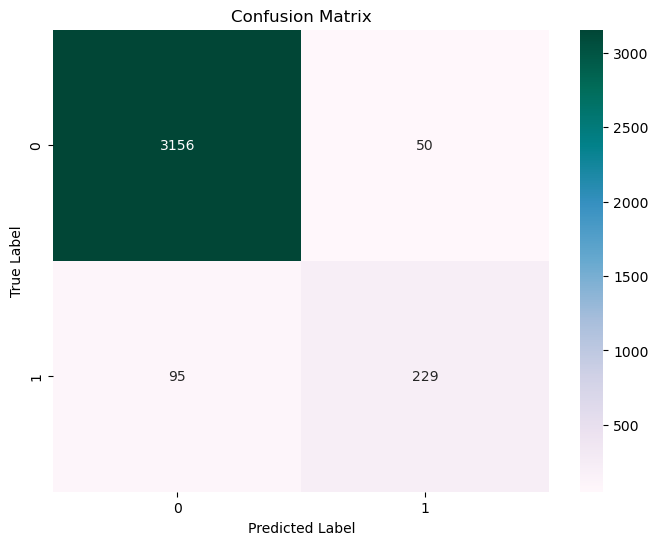

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3206
           1       0.82      0.71      0.76       324

    accuracy                           0.96      3530
   macro avg       0.90      0.85      0.87      3530
weighted avg       0.96      0.96      0.96      3530



In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(final_train_data_feature, final_train_data_label)
y_pred = rf_classifier.predict(x)
# Before
'''
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3206
           1       0.83      0.71      0.77       324

    accuracy                           0.96      3530
   macro avg       0.90      0.85      0.87      3530
weighted avg       0.96      0.96      0.96      3530 
'''
# After
'''
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3206
           1       0.82      0.71      0.76       324

    accuracy                           0.96      3530
   macro avg       0.90      0.85      0.87      3530
weighted avg       0.96      0.96      0.96      3530

'''
# logreg_classifier = LogisticRegression(random_state=42)
# logreg_classifier.fit(final_train_data_feature, final_train_data_label)
# y_pred = logreg_classifier.predict(x)


'''
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3206
           1       0.89      0.53      0.67       324

    accuracy                           0.95      3530
   macro avg       0.92      0.76      0.82      3530
weighted avg       0.95      0.95      0.95      3530

'''


# Evaluate the model
accuracy = accuracy_score(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBuGn", xticklabels=['0', '1'], yticklabels=['0', '1'])#, vmax=cm.max(), cbar_kws={'label': 'Scale'}
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

In [56]:
# Create a DataFrame with test features and predicted results
result_df = pd.DataFrame({'days_on_platform': x.iloc[:, 0], 'minutes_watched': x.iloc[:, 1], 'courses_started':x.iloc[:, 2],'practice_exams_started':x.iloc[:, 3],'student_country_encoded':x.iloc[:, 4],'purchased': y_pred})
# result_df.head()
# Export the DataFrame to a CSV file
result_df.to_csv('predicted_results.csv', index=False)


In [59]:
t_data = pd.read_csv('test.csv')
label_encoder = LabelEncoder()
t_data['student_country_encoded'] = label_encoder.fit_transform(t_data['student_country'])

New_test_df = pd.get_dummies(t_data, columns=['student_country'], prefix='country')

In [61]:
y = t_data.drop(['student_country','practice_exams_passed','minutes_spent_on_exams'], axis=1)

In [63]:
y.shape

(100, 5)

In [65]:
y_pred_final = rf_classifier.predict(y)

In [69]:
y_pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
t_data['purchased']=y_pred_final

In [73]:
t_data['purchased'].value_counts()

0    93
1     7
Name: purchased, dtype: int64

In [75]:
93/100

0.93

In [76]:
t_data.to_csv('Final_data.csv')